<a href="https://colab.research.google.com/github/dacenish/Gold-Price-ForecastingTSA/blob/main/Gold%20Price%20Forecasting%20TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
 #import required Libraries

 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
 from sklearn.linear_model import LinearRegression
 import warnings
 warnings.filterwarnings('ignore')

In [123]:
#Mounting Google drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
#Loading CSV file

file_path = '/content/drive/MyDrive/gold_monthly.csv'
df = pd.read_csv(file_path)


In [125]:
df.head(5)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [178]:
print("Dimension of the dataset:",df.shape)

Dimension of the dataset: (847, 1)


In [127]:
# print the date range of the dataset
print(f"Date range of gold price is available from {df.loc[:,'Date'][0]} to {df.loc[:, 'Date'][len(df)-1 ]}")

Date range of gold price is available from 1950-01 to 2020-07


In [128]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq="M")
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [129]:
# creating a month column and setting it as index
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head(5)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


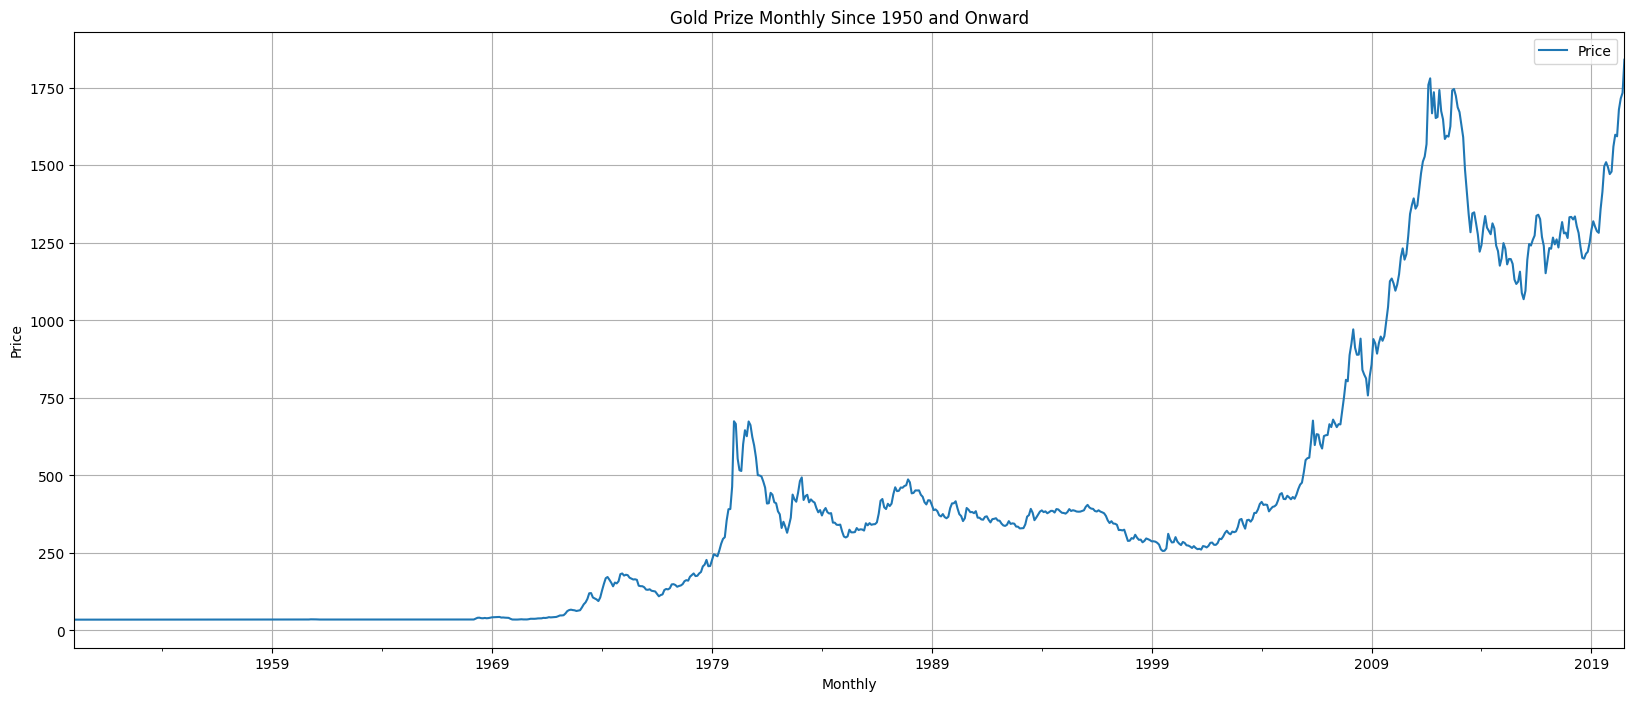

In [183]:
# plotting monthly Golg Price

df.plot(figsize=(20,8))
plt.title('Gold Prize Monthly Since 1950 and Onward')
plt.xlabel('Monthly')
plt.ylabel('Price')
plt.grid()
plt.show()



In [131]:
round (df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


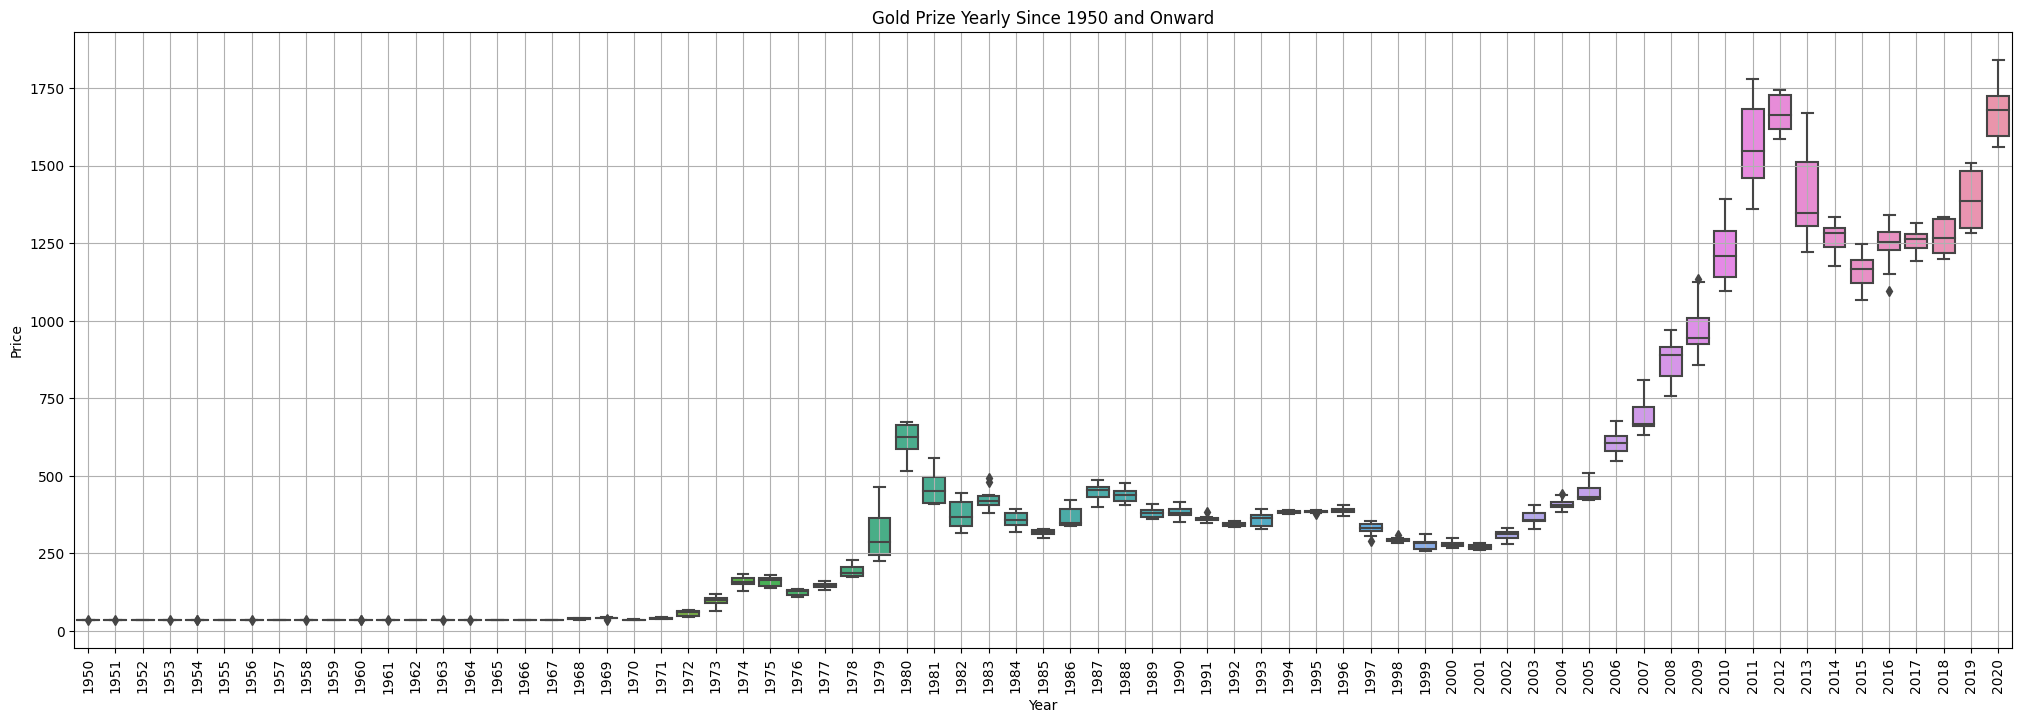

In [182]:
#print gold price yearly

fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year,  y=df.values[:,0], ax= ax)
plt.title('Gold Prize Yearly Since 1950 and Onward')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid()
plt.show()


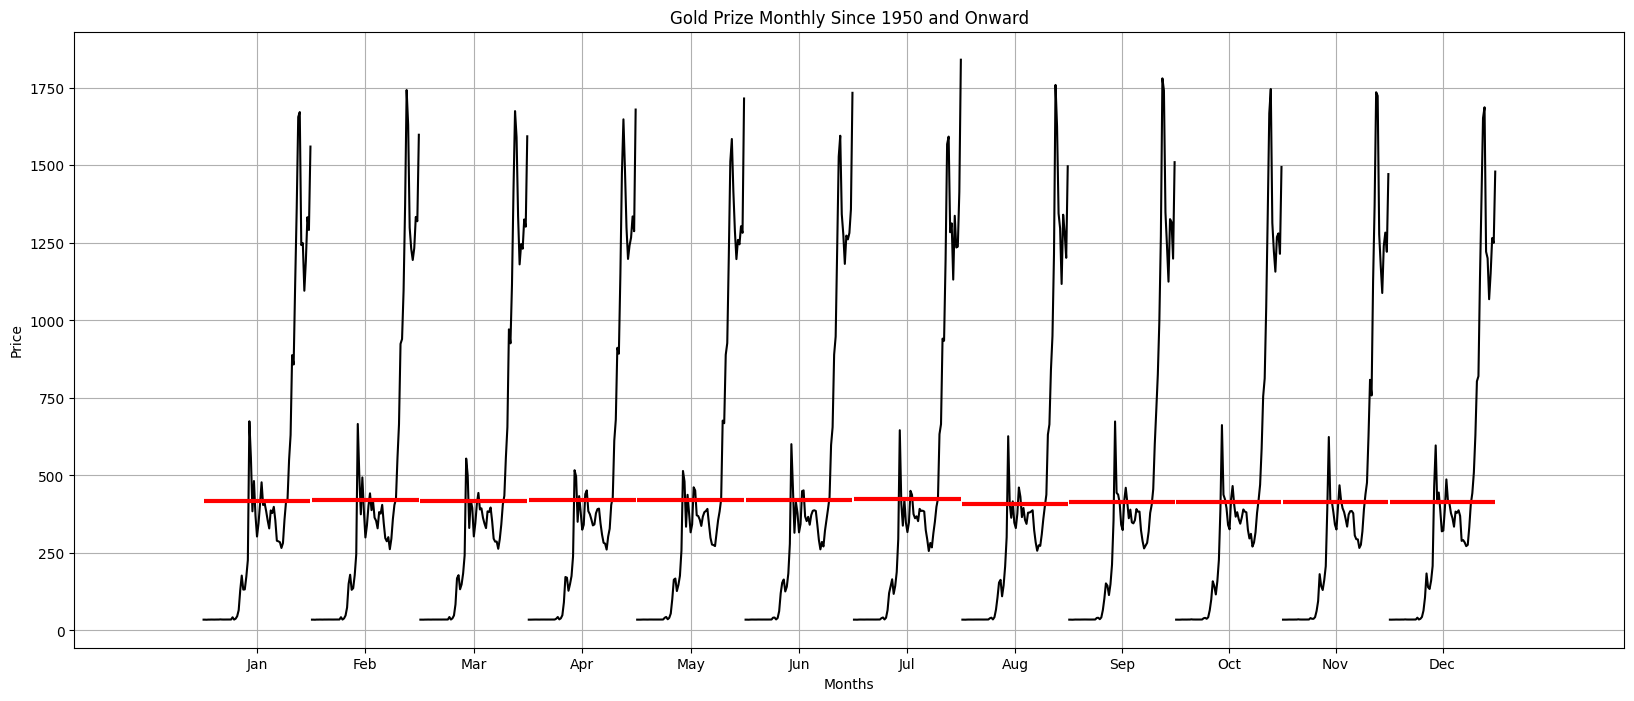

In [133]:
# Plot Gold price month plot
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(20, 8))
month_plot(df, ylabel = 'Gold Price', ax = ax)
plt.title('Gold Prize Monthly Since 1950 and Onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()
plt.show()

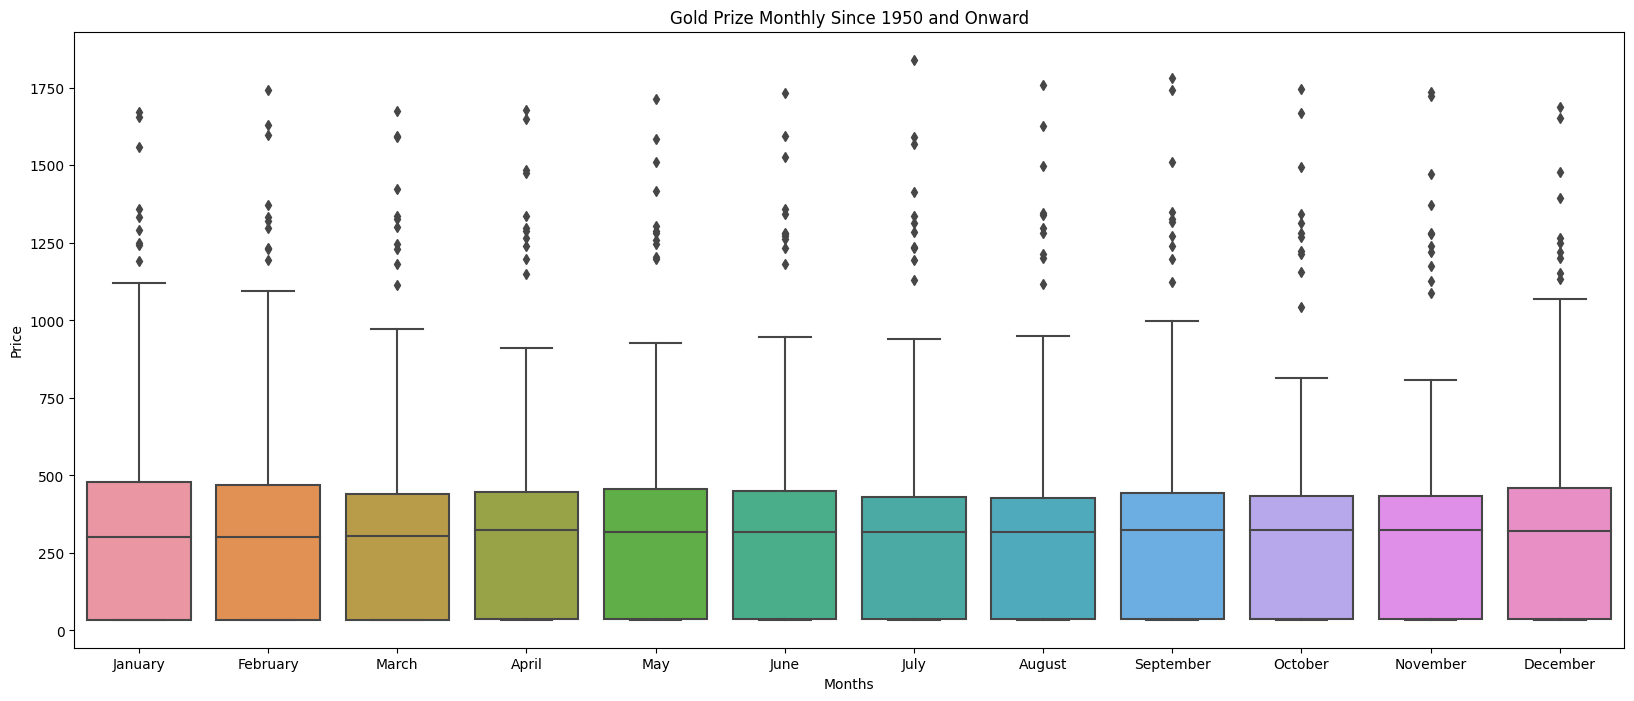

In [134]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Prize Monthly Since 1950 and Onward')
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()

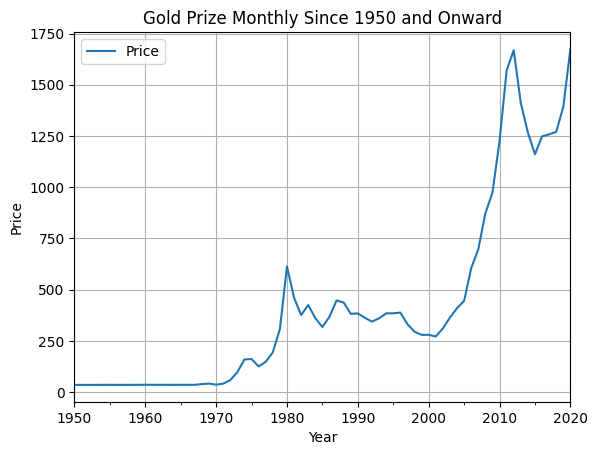

In [135]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Gold Prize Monthly Since 1950 and Onward')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()


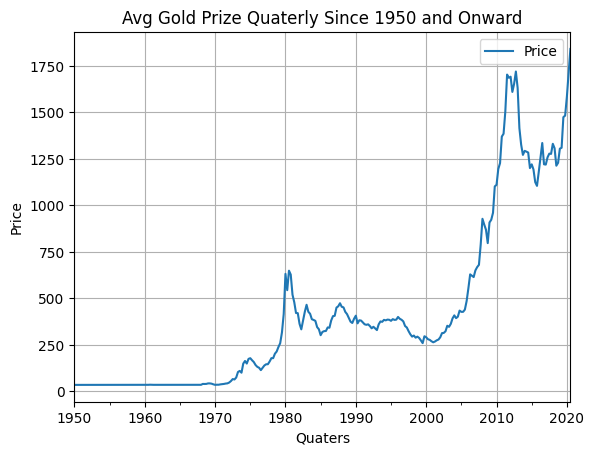

In [136]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title('Avg Gold Prize Quaterly Since 1950 and Onward')
plt.xlabel('Quaters')
plt.ylabel('Price')
plt.grid()
plt.show()


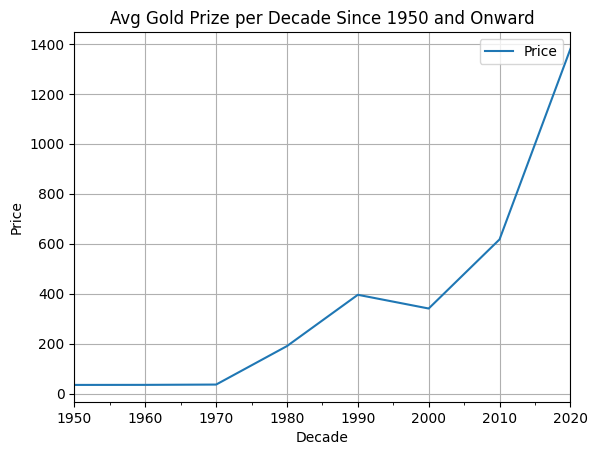

In [137]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Avg Gold Prize per Decade Since 1950 and Onward')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()
plt.show()

In [138]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price': 'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


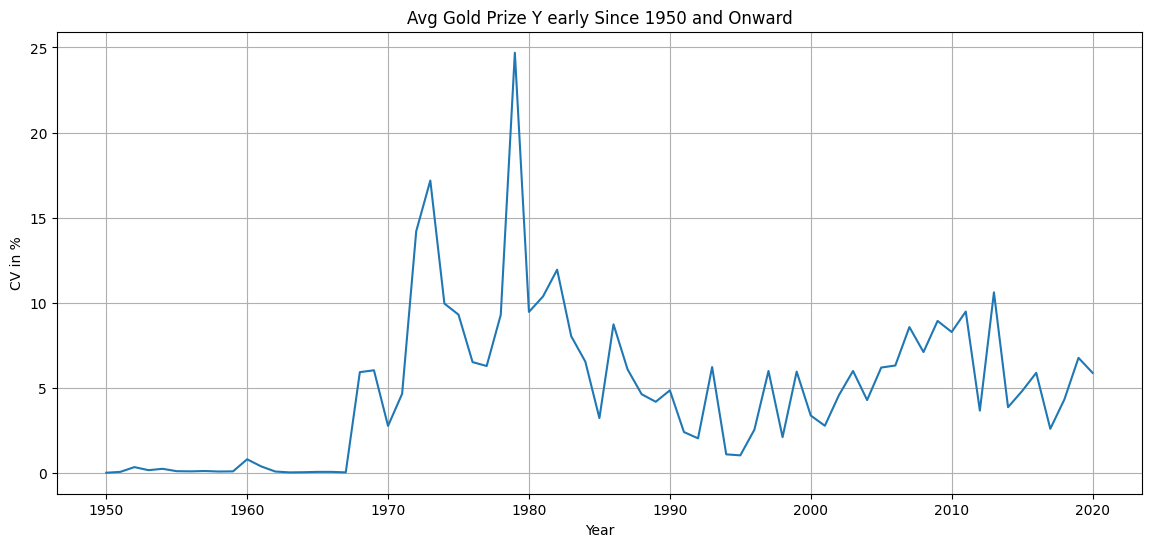

In [139]:
fig, ax = plt.subplots(figsize=(14,6))
df_1['Cov_pct'].plot()
plt.title('Avg Gold Prize Y early Since 1950 and Onward')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()
plt.show()

In [140]:
train = df[df.index.year <=2015]
test = df[df.index.year > 2015]

print("Dimensions of Training dataset",train.shape)
print("Dimensions of Testing dataset",test.shape)

Dimensions of Training dataset (792, 1)
Dimensions of Testing dataset (55, 1)


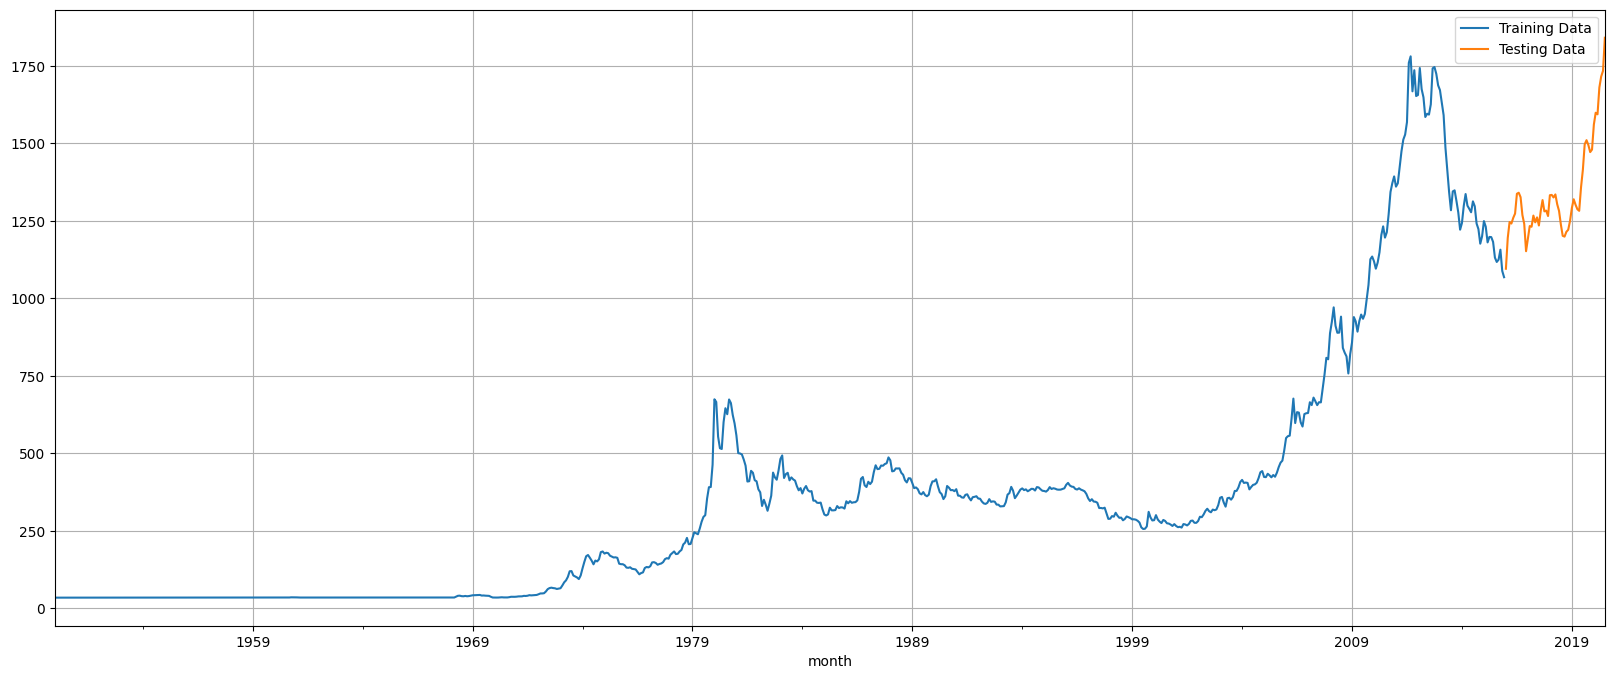

In [141]:
train['Price'].plot(figsize=(20,8))
test ['Price'].plot(figsize=(20,8))
plt.legend(['Training Data', 'Testing Data'])
plt.grid()
plt.show()


In [142]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

# **Performing Logistic Regression For Forecasting.**

In [143]:
LR_train = train.copy()
LR_test = test.copy()

In [144]:
LR_train['Time'] = train_time
LR_test['Time'] = test_time

In [145]:
lr = LinearRegression()
lr.fit(LR_train[['Time']], LR_train['Price'].values)

LinearRegression()

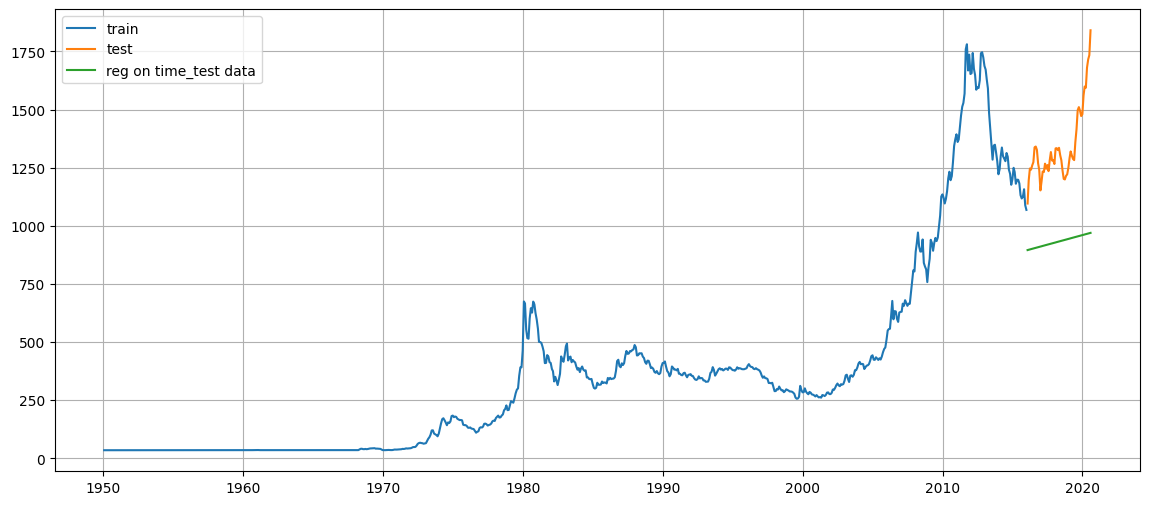

In [146]:
test_prediction_model1 = lr.predict(LR_test[['Time']])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label ='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()

In [153]:
def mape(actual, pred):
  return round(np.mean(abs(actual-pred)/actual) * 100,2)

In [154]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 29.760 %


In [156]:
results = pd.DataFrame({'Test mape (%)': mape_model1_test}, index=['RegressionOnTime'])
results

,Test mape (%)
RegressionOnTime,29.76


# **Performing Logistic Regression For Forecasting.**

In [157]:
Naive_train = train.copy()
Naive_test = test.copy()


In [159]:
Naive_test['naive'] = np.array(train['Price'])[len(np.array(train['Price']))-1]
Naive_test['naive'].head(5)

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

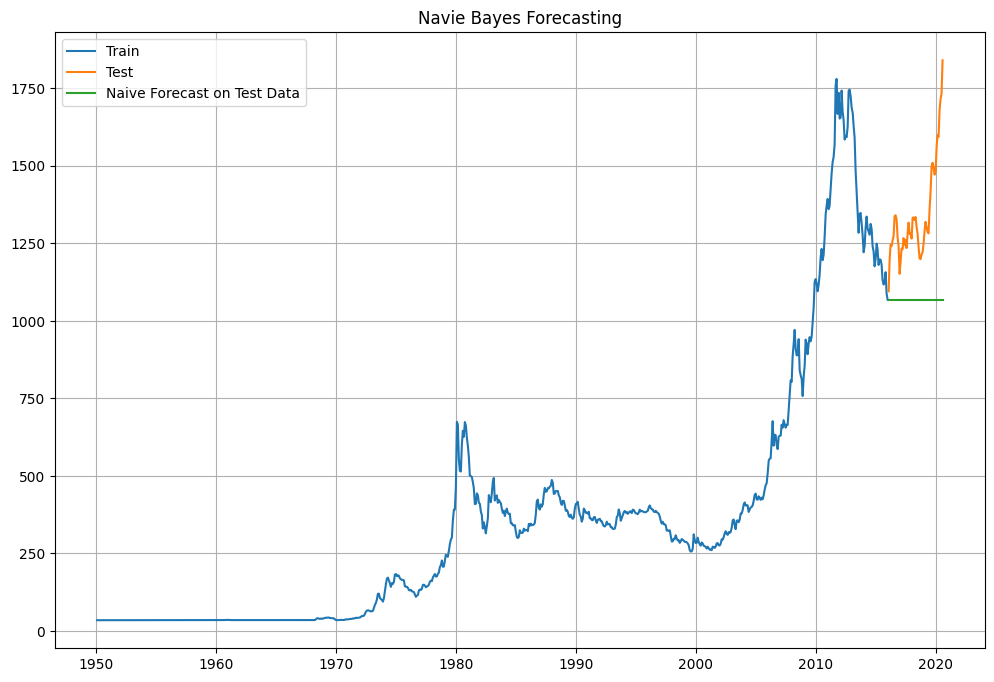

In [161]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Navie Bayes Forecasting')
plt.grid()


In [163]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("MAPE is %3.3f"%(mape_model2_test), "%")

MAPE is 19.380 %


In [166]:
results_df2 = pd.DataFrame({'Test mape (%)': mape_model2_test}, index=['NaiveModel'])
results = pd.concat([results, results_df2])
results

,Test mape (%)
RegressionOnTime,29.76
NaiveModel,19.38


# **Performing Exponential Smoothing For Forecasting.**

In [167]:
es_model = ExponentialSmoothing(df, trend='additive', seasonal='additive')
final_model =  es_model.fit(smoothing_level=0.4, smoothing_trend=0.3, smoothing_seasonal=0.6)


In [170]:
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print('Mape: ', mape_final_model)

Mape:  17.24


In [172]:
prediction = final_model.forecast(steps=len(test))

In [173]:
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
    'Prediction': prediction,
    'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)
                        })
pred_df.head(5)

,lower_CI,Prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


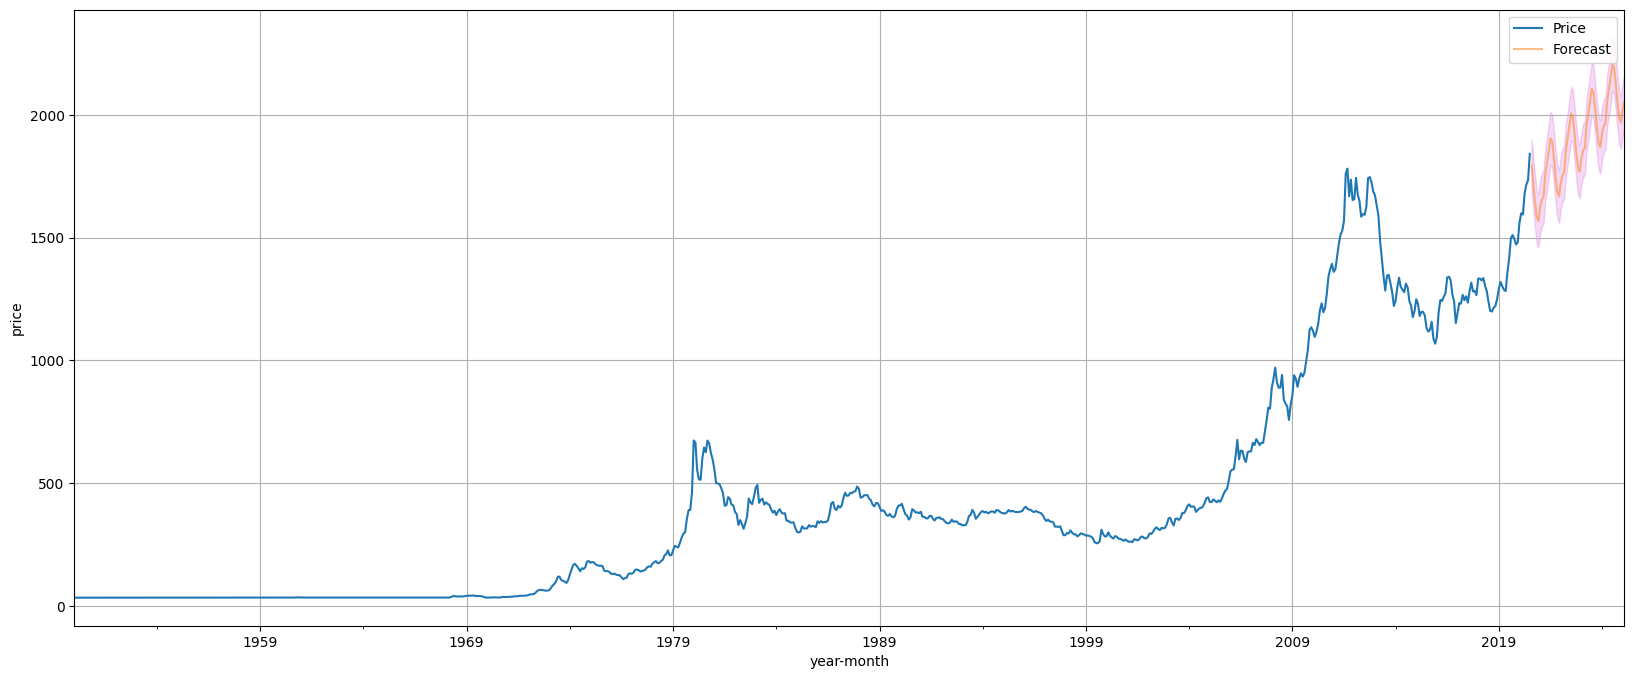

In [176]:
axis = df.plot(label = 'Actual', figsize=(20,8))
pred_df['Prediction'].plot(ax=axis, label ='Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()